<span STYLE="font-size:200%"> 
    Barplot multiple groups
</span>

Docker image: gnasello/datascience-env:2024-06-12\
Latest update: 12 June 2024

# Load required packages

In [1]:
library(ggplot2)
library(dplyr)
library(ggplotUtils)
library(statsUtils)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Load data

In [2]:
filetable <- 'data.csv'

title <- 'Plot Title'
xlabel <- ' '
ylabel <- 'CD25 MFI'
xlabels_ordered <- c('Blank', 'αCDs', 'AS', 'αCDs + AS')
scale_color_manual.values <- c("#8b8c8cff", "#4dbbd5ff", "#ff6666ff", "#4d9999ff")

df <- read.csv(filetable)
head(df)
tail(df)

,y,x
,<dbl>,<chr>
1,14166.41,αCDs + AS
2,31475.33,αCDs + AS
3,10814.73,αCDs + AS
4,19375.93,αCDs + AS
5,4615.28,AS
6,7850.89,AS


,y,x
,<dbl>,<chr>
10,11626.61,αCDs
11,9797.71,αCDs
12,11149.12,αCDs
13,4207.02,Blank
14,7595.49,Blank
15,3944.75,Blank


## Order x labels

Order data frame rows according to vector with specific order

In [3]:
if (exists("xlabels_ordered")) {
    df <- df %>%
            mutate(x = factor(x, levels=xlabels_ordered))
    }

# Bar plot of `y` over `x`

## Summarize the data

The function below will be used to calculate the mean and the standard deviation, for the variable of interest, in each group. See [tutorial](http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization#line-graph-with-error-bars)

In [4]:
df_summary <- data_summary(df, varname='y',
                           groupnames=c('x'))
df_summary

x,mean,sd
<fct>,<dbl>,<dbl>
Blank,5249.087,2036.272
αCDs,9320.083,3171.494
AS,8221.405,2773.863
αCDs + AS,18958.100,9057.785


## Bar plot with point data

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


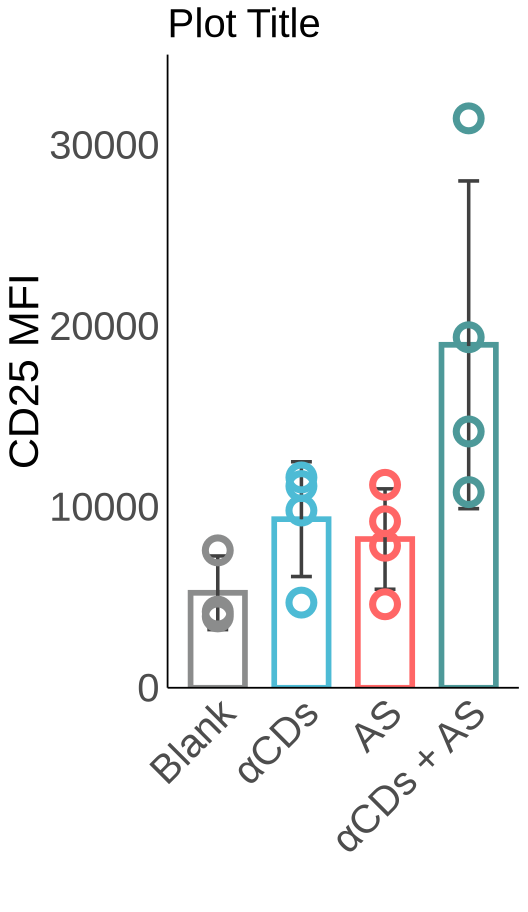

In [5]:
color='#404040ff'

ylim <- c(0,35000)
width=4.4
height=7.6

p <- ggplot() +
     geom_bar(data=df_summary, aes(x=x, y=mean, color=x), fill="white", stat = "identity", width = 0.65, linewidth=1.6) + 
     geom_errorbar(data=df_summary, aes(x=x, y=mean, ymin=mean-sd, ymax=mean+sd), width=.25, linewidth=1, color=color) + 
     geom_point(data=df, aes(x = x, y = y, color=factor(x)), size=5, stroke=3, shape=1)

img <- ggplotMinAethetics(p, width=width, height=height,
                           title=title,
                           plot.title = element_text(size = 24),
                           axis.text=element_text(size=24),
                           axis.title=element_text(size=26),
                           xlabel = xlabel, 
                           ylabel= ylabel, 
                           ylim = ylim,
                           x.text.angle=45,
                           scale_color_manual.values = scale_color_manual.values,
                           legend.position="none"
                          ) + 
            theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

img

# Export plot

In [6]:
filename <- tools::file_path_sans_ext(filetable)
filename

[1] "data"

## `.png` file

In [7]:
fileoutput <- paste(filename,'.png', sep='')
fileoutput

[1] "data.png"

In [8]:
ggsave(file=fileoutput, plot=img, width=width, height=height, bg = 'white')

## `.svg` file

In [9]:
fileoutput <- paste(filename,'.svg', sep='')
fileoutput

[1] "data.svg"

In [10]:
ggsave(file=fileoutput, plot=img, width=width, height=height)